In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

MARKERS = ['+', 'x', '.']
COLORS = ['red', 'green', 'blue']

def plot_points(xy, labels):
    
    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)
        
def plot_boundary(X, pred):
    
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    
    xs, ys = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    xys = np.column_stack([xs.ravel(), ys.ravel()])
    zs = pred(xys).reshape(xs.shape)

    plt.contour(xs, ys, zs, colors='black')

In [12]:
import numpy as np
import sklearn
import sklearn.datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score

X, y = sklearn.datasets.make_moons(200, noise=0.20)

n_examples = len(X)
n_features = 2
n_hidden = 6
n_labels = 2
alpha = 0.01
lambda_ = 0.01

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))



class Network(object):
    
    def __init__(self, n_features, n_hidden, n_labels):
        self.weights = [
            np.random.randn(n_features, n_hidden),
            np.random.randn(n_hidden, n_labels)
        ]
        self.biases = [
            np.random.randn(1, n_hidden),
            np.random.randn(1, n_labels)
        ]

    def predict(self, X):
        a, _ = self._feed_forward(X)
        return np.argmax(a[-1], axis=1)

    def cost(self, X):
        yy = label_binarize([i + 1 for i in y], [1, 2, 3])[:,0:2]

        a, _ = self._feed_forward(X)
        an = a[-1]

        err = (-yy) * np.log(an) - (1 - yy) * np.log(1 - an)
        cost = np.sum(err) / n_examples

        return cost

    def _feed_forward(self, X):
        a = [X]
        z = [X]

        for w, b in zip(self.weights, self.biases):
            z.append(np.dot(a[-1], w) + b)
            a.append(sigmoid(z[-1]))

        return a, z

    def fit(self, X, num_passes=20000):

        W1 = self.weights[0]
        W2 = self.weights[1]
        b1 = self.biases[0]
        b2 = self.biases[1]
        yy = label_binarize([i + 1 for i in y], [1, 2, 3])[:,0:2]

        for i in range(0, num_passes):

            a, z = self._feed_forward(X)
            _, a1, a2 = a
            _, z1, z2 = z

            delta3 = a2 - yy
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0)#, keepdims=True)

            delta2 = delta3.dot(W2.T) * sigmoid_prime(z1)#(1 - np.power(a1, 2))
            dW1 = np.dot(X.T, delta2)
            db1 = np.sum(delta2, axis=0)

            dW2 += lambda_ * W2
            dW1 += lambda_ * W1

            W1 += -alpha * dW1
            b1 += -alpha * db1
            W2 += -alpha * dW2
            b2 += -alpha * db2
            #print(W1.shape, dW1.shape)

            self.weights = [W1, W2]
            self.biases = [b1, b2]

            if i % 1000 == 0:
                print("Iteration %i: %f" %(i, self.cost(X)))

network = Network(n_features, n_hidden, n_labels)
network.fit(X)

print(accuracy_score(y, network.predict(X)))

Iteration 0: 1.297250
Iteration 1000: 0.159610
Iteration 2000: 0.120186
Iteration 3000: 0.109630
Iteration 4000: 0.104127
Iteration 5000: 0.100742
Iteration 6000: 0.098500
Iteration 7000: 0.096933
Iteration 8000: 0.095798
Iteration 9000: 0.094953
Iteration 10000: 0.094312
Iteration 11000: 0.093816
Iteration 12000: 0.093429
Iteration 13000: 0.093122
Iteration 14000: 0.092876
Iteration 15000: 0.092679
Iteration 16000: 0.092519
Iteration 17000: 0.092389
Iteration 18000: 0.092282
Iteration 19000: 0.092195
0.99


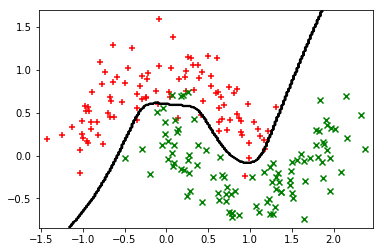

In [13]:
plot_points(X, y)
plot_boundary(X, lambda x: predict(model, x))